<a href="https://colab.research.google.com/github/RaffiSatamyan/Startup_Project/blob/main/Intership_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
import re
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pandas.api.types as pdtypes
import pandas.api.types as pdtypes
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

### Data Preprocessing


In [2]:
# Conecting to the dataset
url = "https://raw.githubusercontent.com/Metricam/Internship_tasks/master/Startup_Success/data.csv"
df = pd.read_csv(url, encoding="unicode_escape")

Firs of all look at all features and understend them

In [3]:
# First look to the data
df.head(5)

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6


In [4]:
# Some look to data
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(5), int64(3), object(108)
memory usage: 427.9+ KB


Index(['Company_Name', 'Dependent-Company Status', 'year of founding',
       'Age of company in years', 'Internet Activity Score',
       'Short Description of company profile', 'Industry of company',
       'Focus functions of company', 'Investors', 'Employee Count',
       ...
       'Percent_skill_Data Science', 'Percent_skill_Business Strategy',
       'Percent_skill_Product Management', 'Percent_skill_Sales',
       'Percent_skill_Domain', 'Percent_skill_Law', 'Percent_skill_Consulting',
       'Percent_skill_Finance', 'Percent_skill_Investment', 'Renown score'],
      dtype='object', length=116)

In [5]:
# Looking to the Null values
not_null=df.isnull().sum()
ind=0
for i in not_null:
  if i!=0:
    print(i,":",df.columns[ind])
  ind += 1

44 : Age of company in years
65 : Internet Activity Score
149 : Short Description of company profile
124 : Industry of company
30 : Focus functions of company
140 : Investors
166 : Employee Count
205 : Employees count MoM change
50 : Has the team size grown
109 : Est. Founding Date
122 : Last Funding Date
160 : Last Funding Amount
71 : Country of company
71 : Continent of company
284 : Number of  of Partners of company
43 : Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?
97 : Specialization of highest education
144 : Degree from a Tier 1 or Tier 2 university?
34 : Experience in selling and building products
199 : Top management similarity
250 : Number of  of Research publications
82 : Industry trend in investing
172 : Gartner hype cycle stage
172 : Time to maturity of technology (in years)


In [6]:
# The features that has numerical value
Numerical_feachures = ['year of founding','Age of company in years','Internet Activity Score','Employee Count','Employees count MoM change','Last Funding Amount','Number of Investors in Seed','Number of Investors in Angel and or VC','Number of Co-founders',
                    'Number of of advisors','Team size Senior leadership','Team size all employees','Number of of repeat investors','Years of education','Renowned in professional circle',
                    'Number of Recognitions for Founders and Co-founders','Skills score','Renown score','Percent_skill_Entrepreneurship', 'Percent_skill_Operations','Percent_skill_Engineering', 'Percent_skill_Marketing','Percent_skill_Leadership', 'Percent_skill_Data Science',
                    'Percent_skill_Business Strategy', 'Percent_skill_Product Management','Percent_skill_Sales', 'Percent_skill_Domain', 'Percent_skill_Law','Percent_skill_Consulting', 'Percent_skill_Finance','Percent_skill_Investment',
                    'Avg time to investment - average across all rounds, measured from previous investment','Time to 1st investment (in months)','Last round of funding received (in milionUSD)','Employees per year of company existence','Number of Direct competitors','Industry trend in investing',
                    'google page rank of company website']

In [7]:
# Features that can be easaly be encoded by several numbers
Incoding_feachures = ['Has the team size grown','Country of company','Continent of company', 'Time to market service or product','Experience in Fortune 100 organizations',
                      'Experience in Fortune 500 organizations','Experience in Fortune 1000 organizations','Invested through global incubation competitions?','Solutions offered','Presence of a top angel or venture fund in previous round of investment',
                      'Worked in top companies', 'Have been part of startups in the past?','Have been part of successful startups in the past?','Was he or she partner in Big 5 consulting?','Consulting experience?','Product or service company?',
                      'Catering to product/service across verticals','Focus on private or public data?','Focus on consumer data?','Focus on structured or unstructured data','Subscription based business','Cloud or platform based serive/product?',
                      'Local or global player','Linear or Non-linear business model','Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive',
                      'Number of  of Partners of company','Crowdsourcing based business','Crowdfunding based business','Machine Learning based business','Predictive Analytics business','Speech analytics business',
                      'Prescriptive analytics business','Big Data Business','Cross-Channel Analytics/ marketing channels','Owns data or not? (monetization of data) e.g. Factual','Is the company an aggregator/market place? e.g. Bluekai',
                      'Online or offline venture - physical location based business or online venture?','B2C or B2B venture?',"Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?",
                      'Average Years of experience for founder and co founder','Exposure across the globe','Breadth of experience across verticals','Highest education','Relevance of education to venture',
                      'Relevance of experience to venture','Degree from a Tier 1 or Tier 2 university?','Experience in selling and building products','Average size of companies worked for in the past', 'Top management similarity','Number of  of Research publications','Team Composition score',
                      'Dificulty of Obtaining Work force','Pricing Strategy','Hyper localisation','Employee benefits and salary structures','Long term relationship with other founders','Barriers of entry for the competitors',
                      'Company awards','Controversial history of founder or co founder','Disruptiveness of technology','Survival through recession, based on existence of the company through recession times','Number of  Sales Support material','Gartner hype cycle stage','Time to maturity of technology (in years)',
                      'Technical proficiencies to analyse and interpret unstructured data','Client Reputation','Legal risk and intellectual property','Proprietary or patent position (competitive position)']

In [8]:
# Some usless, and complicated data to work with is droped
df = df.drop(['Company_Name','Short Description of company profile','Investors'], axis=1)

In [9]:
# Some other data to work specialy later
Date_feachures = ['Est. Founding Date','Last Funding Date']
Split_feachures = ['Focus functions of company','Industry of company','Specialization of highest education']

# Drroped_feachures = ['Company_Name','Short Description of company profile','Investors']
Processed_feachures = Numerical_feachures+Incoding_feachures+Split_feachures+Date_feachures

In [10]:
#Encode the target value to feed to our models
df['Dependent-Company Status'] = df['Dependent-Company Status'].replace({'Success': 1, 'Failed': 0})

In [11]:
# The missing data that is noted by strings
df[Processed_feachures] = df[Processed_feachures].replace(to_replace="No Info", value=None)
df[Processed_feachures] = df[Processed_feachures].replace(to_replace="No info", value=None)
df[Processed_feachures] = df[Processed_feachures].replace(to_replace="no info", value=None)
df[Processed_feachures] = df[Processed_feachures].replace(to_replace='unknown amount', value=None)

In [12]:
# Simplifying text data that we have for work
def process_string(text):
  """
  Processes a string by removing non-alphanumeric characters, converting to lowercase,
  connecting common joining words, and replacing other symbols with spaces.
  """
  # Remove punctuation and non-alphanumeric characters, replacing with spaces
  alphanum_text = re.sub(r"[^\w\s]", ' ', text)

  # Convert to lowercase
  words = alphanum_text.lower()
  # Connect common joining words (adjust list as needed)
  connectives = r"( of | or | . | , | & | in | for | to | a | an | the | at | by | with | on | and | but | nor | as | if | when | because | after | before | until | while | although | though | despite | since | except | but also | yet | either | neither | so | because | thus | therefore | hence | consequently | accordingly | for this reason | as a result | due to the fact that | in light of | owing to | on account of )"
  connected_words = re.sub(connectives, r"\1", words)
  return connected_words

# Working with text data
def normalize(column_name):
  df[column_name] = df[column_name].astype(str)
  for i in df[column_name]:
    df[column_name] = df[column_name].replace(i,re.sub(r"\s+", " ", process_string(i)))

# Making changes
for i in Incoding_feachures+Split_feachures:
  normalize(i)

In [13]:
# Chacking unique values, and looking at the outliers
for i in df[Incoding_feachures]:
  print(df[i].value_counts())
  df[i].unique()

Has the team size grown
no      266
yes     155
nan      50
none      1
Name: count, dtype: int64
Country of company
united states         305
nan                    71
united kingdom         33
india                  10
france                  8
germany                 6
belgium                 5
spain                   5
israel                  4
denmark                 3
canada                  3
bulgaria                3
switzerland             2
argentina               2
finland                 2
azerbaijan              2
austria                 2
czech republic          1
italy                   1
singapore               1
russian federation      1
estonia                 1
sweden                  1
Name: count, dtype: int64
Continent of company
north america    308
europe            76
nan               71
asia              15
south america      2
Name: count, dtype: int64
Time to market service or product
low       253
medium    119
none       83
high       17
Name: count, dtyp

In [14]:
# Encoding Our features for models
encoder = LabelEncoder()
for i in Incoding_feachures:
  df.update({i:encoder.fit_transform(df[i])})

for i in df[Incoding_feachures]:
  print(df[i].value_counts())
  df[i].unique()

Has the team size grown
1    266
3    155
0     50
2      1
Name: count, dtype: int64
Country of company
22    305
15     71
21     33
12     10
10      8
11      6
3       5
18      5
13      4
7       3
5       3
4       3
20      2
0       2
9       2
2       2
1       2
6       1
14      1
17      1
16      1
8       1
19      1
Name: count, dtype: int64
Continent of company
3    308
1     76
2     71
0     15
4      2
Name: count, dtype: int64
Time to market service or product
1    253
2    119
3     83
0     17
Name: count, dtype: int64
Experience in Fortune 100 organizations
0    285
1    105
2     82
Name: count, dtype: int64
Experience in Fortune 500 organizations
0    289
1    101
2     82
Name: count, dtype: int64
Experience in Fortune 1000 organizations
0    305
1     85
2     82
Name: count, dtype: int64
Invested through global incubation competitions?
0    285
1    136
2     51
Name: count, dtype: int64
Solutions offered
2    218
0    169
1     85
Name: count, dtype: int6

In [15]:
# Changing the data types of columns to make able work with them

df[Incoding_feachures] = df[Incoding_feachures].astype(float)
df[Numerical_feachures] = df[Numerical_feachures].astype(float)

some_feachures=Incoding_feachures+Numerical_feachures

df.describe()

,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Employee Count,Employees count MoM change,Has the team size grown,Last Funding Amount,Country of company,Continent of company,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
count,472.000000,413.000000,413.000000,407.000000,306.000000,267.000000,472.000000,3.120000e+02,472.000000,472.000000,...,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,0.646186,2009.394673,4.605327,114.159705,31.408497,-1.299625,1.552966,6.379489e+06,19.243644,2.436441,...,6.081920,10.981158,3.430098,3.357193,4.749903,0.199509,0.482063,1.591776,1.359155,3.291971
std,0.478660,2.607247,2.607247,225.651419,62.673600,23.967085,1.057453,9.901622e+06,4.856537,0.876798,...,10.489245,10.692645,4.838578,5.508258,7.563462,1.938989,2.094291,6.603480,3.389387,2.821937
min,0.000000,1997.000000,1.000000,-725.000000,0.000000,-100.000000,0.000000,1.000000e+04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2008.000000,3.000000,-3.500000,4.250000,0.000000,1.000000,7.500000e+05,15.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,2010.000000,4.000000,60.000000,13.000000,0.000000,1.000000,2.800000e+06,22.000000,3.000000,...,1.851852,8.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,2011.000000,6.000000,216.000000,31.000000,6.000000,3.000000,7.850000e+06,22.000000,3.000000,...,8.333333,18.382353,5.555556,5.555556,5.882353,0.000000,0.000000,0.000000,0.000000,5.000000
max,1.000000,2013.000000,17.000000,1535.000000,594.000000,50.000000,3.000000,7.700000e+07,22.000000,4.000000,...,80.000000,50.000000,25.000000,33.333333,44.444444,33.333333,20.000000,78.571429,33.333333,11.000000


# Analising The Data

throw correlation

In [16]:
# Checking the corrolation betwen target value and features

corr_list=[]

for i in some_feachures:
  corr_list.append([i,df['Dependent-Company Status'].corr(df[i], method='spearman')])

def sort_by_second(sublist):
  return sublist[1]  # Return the second element for sorting

sorted_corr_list = sorted(corr_list, key=sort_by_second, reverse=True)

# take look only on results having correlation over 0.2

for i in sorted_corr_list:
  if sorted_corr_list[sorted_corr_list.index(i)][1]>0.2:
    print(i)

['Survival through recession, based on existence of the company through recession times', 0.6566106493243339]
['Internet Activity Score', 0.4283361811636267]
['Has the team size grown', 0.4132326380227143]
['Big Data Business', 0.3992219112624137]
['year of founding', 0.33839601880730946]
['Gartner hype cycle stage', 0.33227273676177277]
['Relevance of experience to venture', 0.3315069127340339]
['Team size Senior leadership', 0.32610299636865087]
['Exposure across the globe', 0.3027009859422393]
['Number of Recognitions for Founders and Co-founders', 0.29667030423387797]
['Catering to product/service across verticals', 0.29425607900469747]
['Employees per year of company existence', 0.28707034586255004]
['Predictive Analytics business', 0.2777519921998703]
['Employee Count', 0.2655494828792158]
['Percent_skill_Data Science', 0.2653800944359315]
['Relevance of education to venture', 0.22840617213489278]
['Number of Co-founders', 0.21953641914416278]
['Technical proficiencies to analyse

423    0
22     1
451    0
46     1
248    1
      ..
106    1
270    0
348    1
435    0
102    1
Name: Dependent-Company Status, Length: 377, dtype: int64
Accuracy: 0.9157894736842105
[[30  3]
 [ 5 57]]


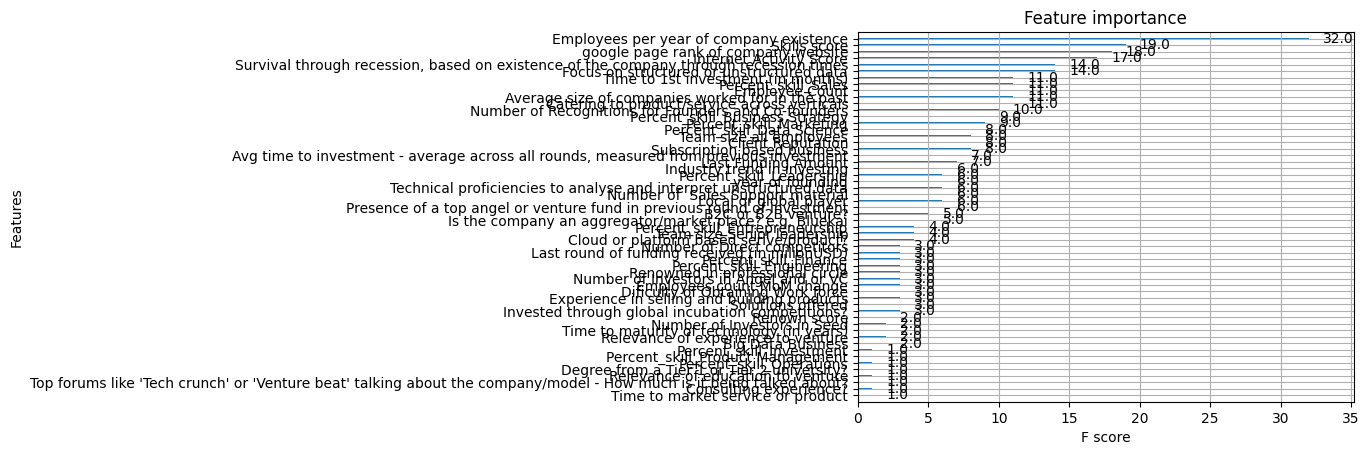

In [17]:
# Throw XGBoost
X = df[some_feachures]
y = df['Dependent-Company Status']
if xgboost.__version__ >= '1.7':
  # Leverage native categorical feature support
  model = XGBClassifier(objective='binary:logistic', enable_categorical=True)  # Adjust parameters as needed
else:
  # One-hot encode categorical features
  from sklearn.preprocessing import OneHotEncoder
  encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
  categorical_features = ['location']
  X_encoded = pd.concat([X, encoder.fit_transform(df[categorical_features])], axis=1)
  model = XGBClassifier(objective='binary:logistic', enable_categorical=True)  # Adjust parameters as needed

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded if xgboost.__version__ < '1.7' else X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
print(y_train)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance (e.g., accuracy, confusion matrix)
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))

# Explore feature importance (if applicable)
if xgboost.__version__ >= '1.0':
  from xgboost import plot_importance
  plot_importance(model)

In [18]:
# Take a glance at importance of fetures
importance_type = 'gain'
feature_importance = model.get_booster().get_score(importance_type=importance_type)

# Espatialy the most importont ones
importance_df = pd.DataFrame(feature_importance, index=["importance"])
importance_df.transpose().sort_values(by='importance', ascending=False)[:15]

,importance
"Survival through recession, based on existence of the company through recession times",34.893826
Big Data Business,7.320145
Consulting experience?,7.104892
Solutions offered,5.490166
Number of Sales Support material,5.223610
Dificulty of Obtaining Work force,3.382601
Team size all employees,2.839163
Team size Senior leadership,2.506034
Employees per year of company existence,2.365256
Industry trend in investing,2.164565


In [19]:
# Split some features to try makeing mor meeningfull information from them
for i in Split_feachures:
  df[i] = df[i].apply(lambda x: x.split() if isinstance(x, str) else [])

#df[Split_feachures] = df[Split_feachures].replace(to_replace=['nan'], value=None)

In [20]:
# we can extract different features from same column
enc_list = []
k=0
def collect_dict(df_column):
  for i in df[df_column]:
    for j in i:
      if j not in enc_list:
        enc_list.append(j)

collect_dict('Industry of company')

print(enc_list)
print(len(enc_list))


del enc_list[enc_list.index("nan")]

['nan', 'market', 'research', 'marketing', 'crowdfunding', 'analytics', 'cloud', 'computing', 'software', 'development', 'mobile', 'enterprise', 'food', 'beverages', 'hospitality', 'network', 'hosting', 'infrastructure', 'healthcare', 'pharmaceuticals', 'media', 'finance', 'music', 'e', 'commerce', 'gaming', 'advertising', 'retail', 'security', 'email', 'human', 'resources', 'hr', 'career', 'job', 'search', 'publishing', 'education', 'energy', 'deals', 'entertainment', 'transportation', 'social', 'networking', 'real', 'estate', 'telecommunications', 'insurance', 'cleantech', 'space', 'travel', 'classifieds', 'government']
53


In [21]:
# Create a DataFrame with zeros and specify data type as float (optional)
print(enc_list)
new_df = pd.DataFrame(index=range(len(df)), columns=enc_list)

# Fill the DataFrame with zeros
new_df.fillna(0, inplace=True)

print(new_df)

['market', 'research', 'marketing', 'crowdfunding', 'analytics', 'cloud', 'computing', 'software', 'development', 'mobile', 'enterprise', 'food', 'beverages', 'hospitality', 'network', 'hosting', 'infrastructure', 'healthcare', 'pharmaceuticals', 'media', 'finance', 'music', 'e', 'commerce', 'gaming', 'advertising', 'retail', 'security', 'email', 'human', 'resources', 'hr', 'career', 'job', 'search', 'publishing', 'education', 'energy', 'deals', 'entertainment', 'transportation', 'social', 'networking', 'real', 'estate', 'telecommunications', 'insurance', 'cleantech', 'space', 'travel', 'classifieds', 'government']
     market  research  marketing  crowdfunding  analytics  cloud  computing  \
0         0         0          0             0          0      0          0   
1         0         0          0             0          0      0          0   
2         0         0          0             0          0      0          0   
3         0         0          0             0          0    

In [22]:
# Change multiple or one columns: feature engeneering

#for i in Split_feachures[1]:
for j in range(len(df['Industry of company'])):
  for k in df['Industry of company'][j]:
    if k in enc_list:
#        print(enc_list.index(k), new_df[k][j])
      new_df[k][j] = 1
#        print(k, enc_list.index(k), df[i][j].index(k))

In [23]:
new_df

,market,research,marketing,crowdfunding,analytics,cloud,computing,software,development,mobile,...,networking,real,estate,telecommunications,insurance,cleantech,space,travel,classifieds,government
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
470,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Concatinate the new data
df1 = pd.concat([df, new_df], axis=1)
# Look at them
df1["Dependent-Company Status"].sum()
df1.columns[:-10]

Index(['Dependent-Company Status', 'year of founding',
       'Age of company in years', 'Internet Activity Score',
       'Industry of company', 'Focus functions of company', 'Employee Count',
       'Employees count MoM change', 'Has the team size grown',
       'Est. Founding Date',
       ...
       'career', 'job', 'search', 'publishing', 'education', 'energy', 'deals',
       'entertainment', 'transportation', 'social'],
      dtype='object', length=155)

423    0
22     1
451    0
46     1
248    1
      ..
106    1
270    0
348    1
435    0
102    1
Name: Dependent-Company Status, Length: 377, dtype: int64
Accuracy: 0.9157894736842105
[[30  3]
 [ 5 57]]


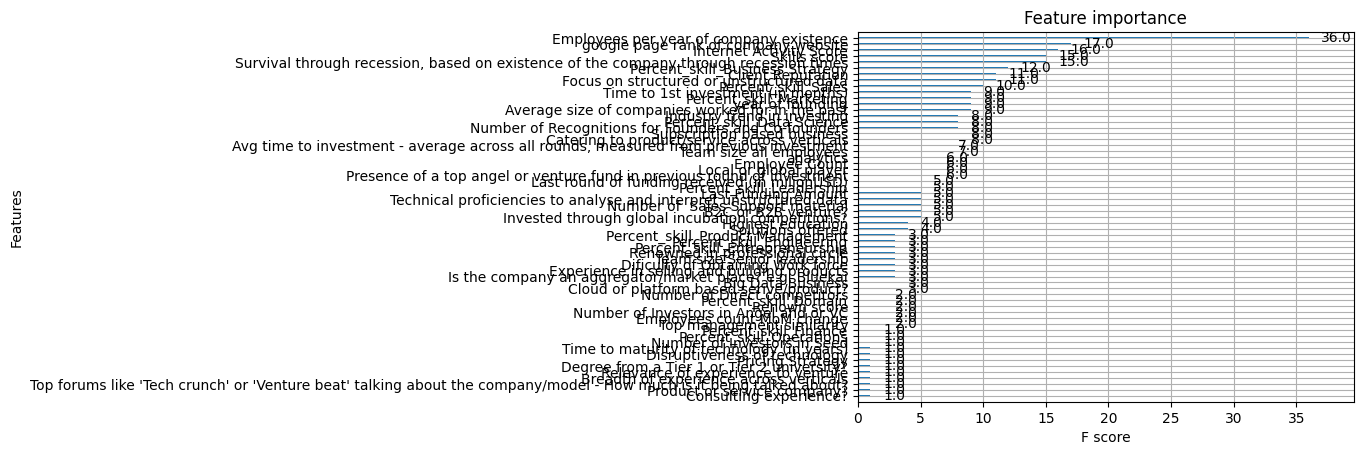

In [25]:
# Buildin XGBoost on new dataset to chake if there is a difference
some_feachures1 = some_feachures + enc_list
X = df1[some_feachures1]
y = df1['Dependent-Company Status']
if xgboost.__version__ >= '1.7':
  # Leverage native categorical feature support
  model = XGBClassifier(objective='binary:logistic', enable_categorical=True)  # Adjust parameters as needed
else:
  # One-hot encode categorical features
  from sklearn.preprocessing import OneHotEncoder
  encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
  categorical_features = ['location']
  X_encoded = pd.concat([X, encoder.fit_transform(df[categorical_features])], axis=1)
  model = XGBClassifier(objective='binary:logistic', enable_categorical=True)  # Adjust parameters as needed

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded if xgboost.__version__ < '1.7' else X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
print(y_train)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance (e.g., accuracy, confusion matrix)
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))

# Explore feature importance (if applicable)
if xgboost.__version__ >= '1.0':
  from xgboost import plot_importance
  plot_importance(model)

In [26]:
# Take a glance at importance of fetures
importance_type = 'gain'
feature_importance = model.get_booster().get_score(importance_type=importance_type)

# Espatialy the most importont ones
importance_df = pd.DataFrame(feature_importance, index=["importance"])
importance_df.transpose().sort_values(by='importance', ascending=False)[:15]


,importance
"Survival through recession, based on existence of the company through recession times",32.598118
Consulting experience?,7.104892
Number of Sales Support material,6.100850
Big Data Business,4.962063
Solutions offered,4.346300
Relevance of experience to venture,3.977120
Team size Senior leadership,3.263638
Team size all employees,3.200919
Dificulty of Obtaining Work force,3.009743
Time to maturity of technology (in years),2.606149


In [27]:
# Create a DataFrame with zeros and specify data type as float (optional)
new_df2 = pd.DataFrame(index=range(len(df)), columns=["tech"])

# Fill the DataFrame with zeros
new_df2.fillna(0, inplace=True)

print(new_df2)

     tech
0       0
1       0
2       0
3       0
4       0
..    ...
467     0
468     0
469     0
470     0
471     0

[472 rows x 1 columns]


In [28]:
# insteed of deviding all categoris by one, now we are trying to group them and show what we will get
print(enc_list)
print(len(enc_list))

enc_list_tech = ['research','market' ,'analytics','computing','development','mobile','network','hosting','email','hr','search']

['market', 'research', 'marketing', 'crowdfunding', 'analytics', 'cloud', 'computing', 'software', 'development', 'mobile', 'enterprise', 'food', 'beverages', 'hospitality', 'network', 'hosting', 'infrastructure', 'healthcare', 'pharmaceuticals', 'media', 'finance', 'music', 'e', 'commerce', 'gaming', 'advertising', 'retail', 'security', 'email', 'human', 'resources', 'hr', 'career', 'job', 'search', 'publishing', 'education', 'energy', 'deals', 'entertainment', 'transportation', 'social', 'networking', 'real', 'estate', 'telecommunications', 'insurance', 'cleantech', 'space', 'travel', 'classifieds', 'government']
52


In [29]:
# Creating new data

# For i in Split_feachures[1]:
for j in range(len(df['Industry of company'])):
  for k in df['Industry of company'][j]:
    if k in enc_list_tech:
      new_df2["tech"][j] = 1

new_df2

,tech
0,0
1,1
2,1
3,1
4,1
...,...
467,0
468,0
469,1
470,1


In [30]:
# Concatinate new data
df2 = pd.concat([df, new_df2], axis=1)

Log_Reg Accuracy: 0.9157894736842105
Log_Reg Precision: 0.95
Log_Reg Recall: 0.9193548387096774
Log_Reg F1-score: 0.9344262295081968
423    0
22     1
451    0
46     1
248    1
      ..
106    1
270    0
348    1
435    0
102    1
Name: Dependent-Company Status, Length: 377, dtype: int64
Accuracy: 0.9157894736842105
[[29  4]
 [ 4 58]]


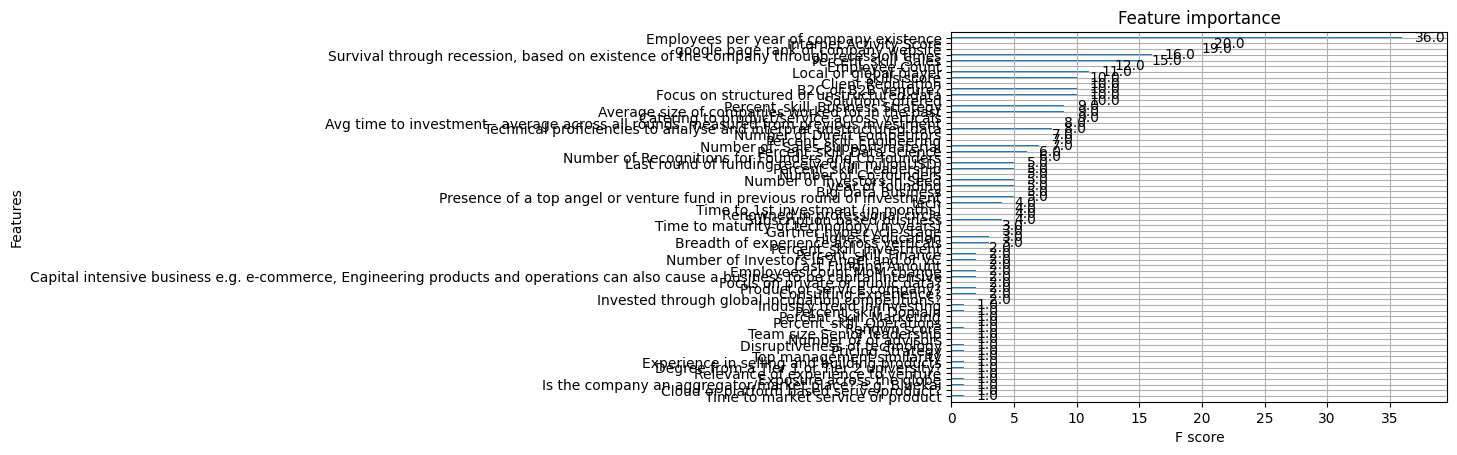

In [31]:
# Hnadleing the missing values espacialy for logistic regression

df2.fillna(method='ffill', inplace=True)
df2.fillna(method='bfill', inplace=True)

some_feachures2 = some_feachures + ["tech"]
X = df2[some_feachures2]
y = df2['Dependent-Company Status']
if xgboost.__version__ >= '1.7':
  # Leverage native categorical feature support
  model = XGBClassifier(objective='binary:logistic', enable_categorical=True)  # Adjust parameters as needed
else:
  # One-hot encode categorical features
  from sklearn.preprocessing import OneHotEncoder
  encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
  categorical_features = ['location']
  X_encoded = pd.concat([X, encoder.fit_transform(df[categorical_features])], axis=1)
  model = XGBClassifier(objective='binary:logistic', enable_categorical=True)  # Adjust parameters as needed

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded if xgboost.__version__ < '1.7' else X, y, test_size=0.2, random_state=42)


# logistic regression moodel
model2 = LogisticRegression(solver="liblinear")
#Train the logistic regression model
model2.fit(X_train, y_train)
# Make prediction on test data
model2.predict(X_test)
# Evaluate the prediction of logistic regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Log_Reg Accuracy:", accuracy_score(y_test, y_pred))
print("Log_Reg Precision:", precision_score(y_test, y_pred))
print("Log_Reg Recall:", recall_score(y_test, y_pred))
print("Log_Reg F1-score:", f1_score(y_test, y_pred))


# Train the XGBoost model
print(y_train)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance (e.g., accuracy, confusion matrix)
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))

# Explore feature importance (if applicable)
if xgboost.__version__ >= '1.0':
  from xgboost import plot_importance
  plot_importance(model)

In [32]:
# Take a glance at importance of fetures
importance_type = 'gain'
feature_importance = model.get_booster().get_score(importance_type=importance_type)

# Espatialy the most importont ones
importance_df = pd.DataFrame(feature_importance, index=["importance"])
importance_df.transpose().sort_values(by='importance', ascending=False)[:15]


,importance
"Survival through recession, based on existence of the company through recession times",30.755913
Big Data Business,4.857841
Number of Sales Support material,3.980202
Disruptiveness of technology,3.796082
Industry trend in investing,3.682300
Relevance of experience to venture,3.182323
Number of Recognitions for Founders and Co-founders,2.673839
Employees per year of company existence,2.652626
Client Reputation,2.601300
Consulting experience?,2.523949


In [33]:
# Chack if the pca make difference (spoiler-Nope)
pca = PCA(n_components=1)
pca.fit(df2[some_feachures2])
transformed_np = pca.transform(df2[some_feachures2])
transformed_df = pd.DataFrame(transformed_np)

In [34]:
#Log reg
X = transformed_df
y = df2['Dependent-Company Status']

X_train, X_test, y_train, y_test = train_test_split(X_encoded if xgboost.__version__ < '1.7' else X, y, test_size=0.2, random_state=42)


# logistic regression moodel
model2 = LogisticRegression(solver="liblinear")
#Train the logistic regression model
model2.fit(X_train, y_train)
# Make prediction on test data
model2.predict(X_test)
# Evaluate the prediction of logistic regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Log_Reg Accuracy:", accuracy_score(y_test, y_pred))
print("Log_Reg Precision:", precision_score(y_test, y_pred))
print("Log_Reg Recall:", recall_score(y_test, y_pred))
print("Log_Reg F1-score:", f1_score(y_test, y_pred))

Log_Reg Accuracy: 0.9157894736842105
Log_Reg Precision: 0.9354838709677419
Log_Reg Recall: 0.9354838709677419
Log_Reg F1-score: 0.9354838709677419
